In [27]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker

df=pd.read_csv('diabetes.csv',index_col=0)
df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,,,,,,,,
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
10,101,76,48,180,32.9,0.171,63,0
2,122,70,27,0,36.8,0.340,27,0
5,121,72,23,112,26.2,0.245,30,0


In [8]:
df.isnull().sum()

Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

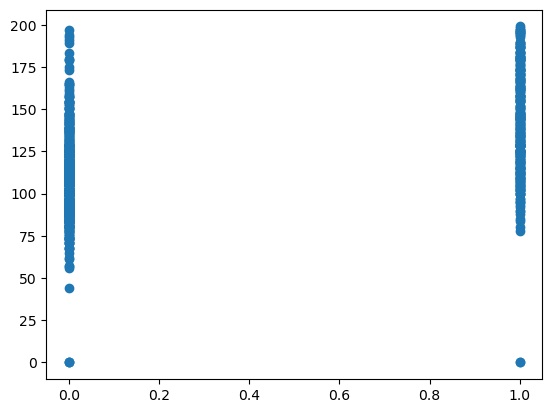

In [16]:
x=df['Outcome']
y=df['Glucose']
plt.scatter(x, y)
plt.show()

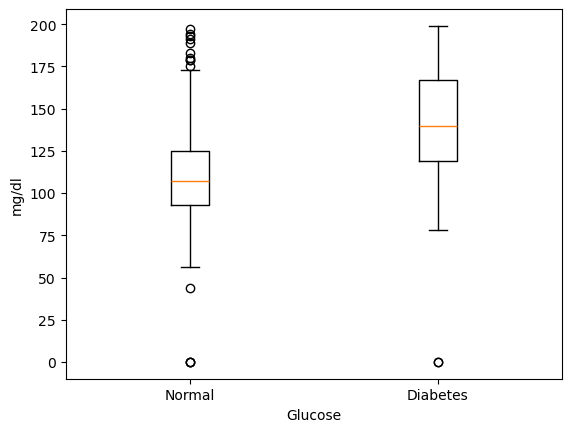

In [29]:
fig, ax = plt.subplots()
df_normal=df[(df['Outcome']==0)]
df_diabetes=df[(df['Outcome']==1)]
ax.boxplot([df_normal['Glucose'],df_diabetes['Glucose']])
ax.xaxis.set_major_formatter(ticker.FixedFormatter(('Normal','Diabetes')))
ax.set_xlabel('Glucose')
ax.set_ylabel('mg/dl')
plt.show()

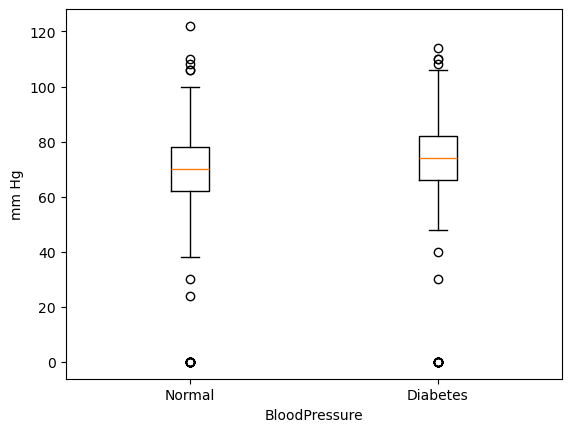

In [30]:
fig, ax = plt.subplots()
df_normal=df[(df['Outcome']==0)]
df_diabetes=df[(df['Outcome']==1)]
ax.boxplot([df_normal['BloodPressure'],df_diabetes['BloodPressure']])
ax.xaxis.set_major_formatter(ticker.FixedFormatter(('Normal','Diabetes')))
ax.set_xlabel('BloodPressure')
ax.set_ylabel('mm Hg')
plt.show()

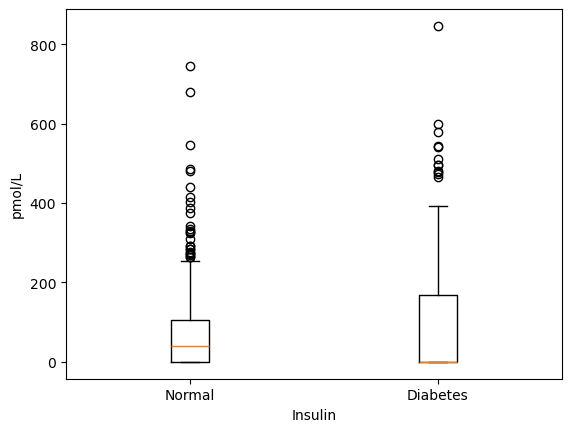

In [31]:
fig, ax = plt.subplots()
df_normal=df[(df['Outcome']==0)]
df_diabetes=df[(df['Outcome']==1)]
ax.boxplot([df_normal['Insulin'],df_diabetes['Insulin']])
ax.xaxis.set_major_formatter(ticker.FixedFormatter(('Normal','Diabetes')))
ax.set_xlabel('Insulin')
ax.set_ylabel('pmol/L')
plt.show()

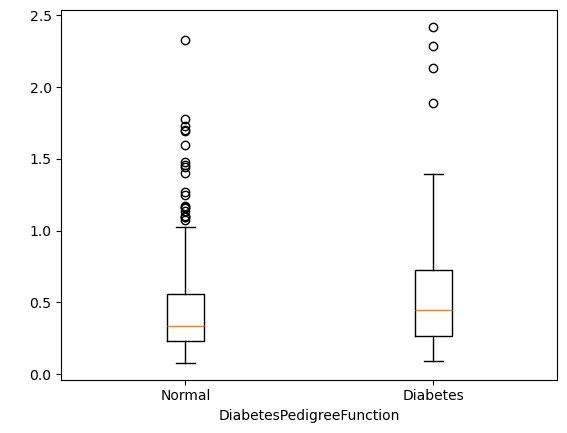

In [34]:
fig, ax = plt.subplots()
df_normal=df[(df['Outcome']==0)]
df_diabetes=df[(df['Outcome']==1)]
ax.boxplot([df_normal['DiabetesPedigreeFunction'],df_diabetes['DiabetesPedigreeFunction']])
ax.xaxis.set_major_formatter(ticker.FixedFormatter(('Normal','Diabetes')))
ax.set_xlabel('DiabetesPedigreeFunction')
ax.set_ylabel(' ')
plt.show()

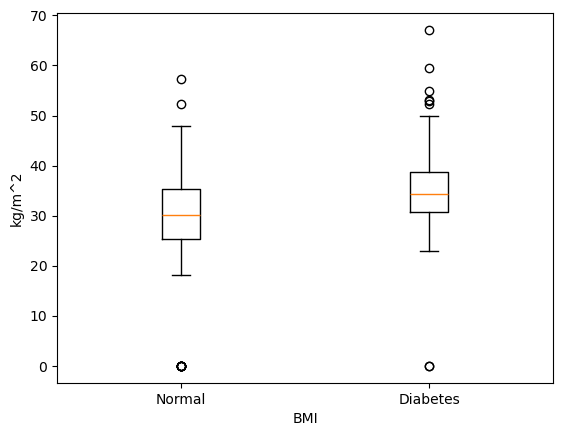

In [35]:
fig, ax = plt.subplots()
df_normal=df[(df['Outcome']==0)]
df_diabetes=df[(df['Outcome']==1)]
ax.boxplot([df_normal['BMI'],df_diabetes['BMI']])
ax.xaxis.set_major_formatter(ticker.FixedFormatter(('Normal','Diabetes')))
ax.set_xlabel('BMI')
ax.set_ylabel('kg/m^2')
plt.show()

In [37]:
df.value_counts()

Glucose  BloodPressure  SkinThickness  Insulin  BMI   DiabetesPedigreeFunction  Age  Outcome
0        48             20             0        24.7  0.140                     22   0          1
         68             35             0        32.0  0.389                     22   0          1
129      86             20             270      35.1  0.231                     23   0          1
         90             7              326      19.6  0.582                     60   0          1
         92             49             155      36.4  0.968                     32   1          1
                                                                                               ..
105      75             0              0        23.3  0.560                     53   0          1
         80             28             0        32.5  0.878                     26   0          1
                        45             191      33.7  0.711                     29   1          1
         84             0

In [43]:
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 선언 및 Fitting
mMscaler = MinMaxScaler()
mMscaler.fit(df)

# 데이터 변환
mMscaled_data = mMscaler.transform(df)

# 데이터 프레임으로 저장
mMscaled_data = pd.DataFrame(mMscaled_data)

mMscaled_data

,0,1,2,3,4,5,6,7
0,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,1.0
1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0.0
2,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1.0
3,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0.0
4,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1.0
...,...,...,...,...,...,...,...,...
763,0.507538,0.622951,0.484848,0.212766,0.490313,0.039710,0.700000,0.0
764,0.613065,0.573770,0.272727,0.000000,0.548435,0.111870,0.100000,0.0
765,0.608040,0.590164,0.232323,0.132388,0.390462,0.071307,0.150000,0.0
766,0.633166,0.491803,0.000000,0.000000,0.448584,0.115713,0.433333,1.0


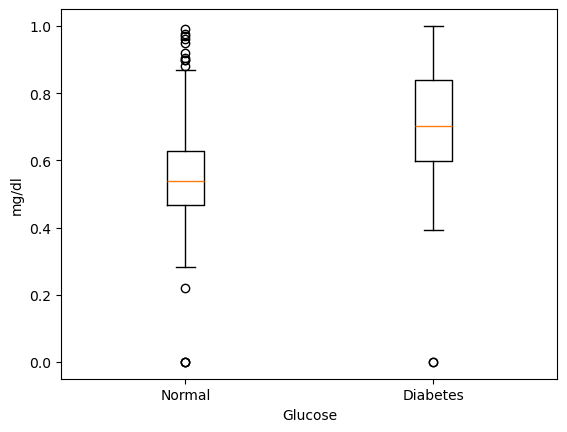

In [47]:
fig, ax = plt.subplots()
df_normal=mMscaled_data[(mMscaled_data[7]==0)]
df_diabetes=mMscaled_data[(mMscaled_data[7]==1)]
ax.boxplot([df_normal[0],df_diabetes[0]])
ax.xaxis.set_major_formatter(ticker.FixedFormatter(('Normal','Diabetes')))
ax.set_xlabel('Glucose')
ax.set_ylabel('mg/dl')
plt.show()

In [59]:
from sklearn.preprocessing import StandardScaler

standardScaler = StandardScaler() 
print(standardScaler.fit(df))
df_standardScaled = standardScaler.transform(df)
df_standard = pd.DataFrame(df_standardScaled)
df_standard

StandardScaler()


,0,1,2,3,4,5,6,7
0,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1.365896
1,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,-0.732120
2,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1.365896
3,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,-0.732120
4,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,1.365896
...,...,...,...,...,...,...,...,...
763,-0.622642,0.356432,1.722735,0.870031,0.115169,-0.908682,2.532136,-0.732120
764,0.034598,0.046245,0.405445,-0.692891,0.610154,-0.398282,-0.531023,-0.732120
765,0.003301,0.149641,0.154533,0.279594,-0.735190,-0.685193,-0.275760,-0.732120
766,0.159787,-0.470732,-1.288212,-0.692891,-0.240205,-0.371101,1.170732,1.365896


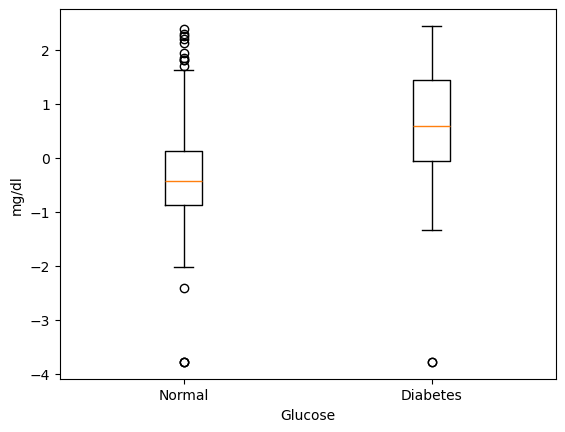

In [62]:
fig, ax = plt.subplots()
df_normal=df_standard[(df_standard[7]<0)]
df_diabetes=df_standard[(df_standard[7]>0)]
ax.boxplot([df_normal[0],df_diabetes[0]])
ax.xaxis.set_major_formatter(ticker.FixedFormatter(('Normal','Diabetes')))
ax.set_xlabel('Glucose')
ax.set_ylabel('mg/dl')
plt.show()